In [1]:
from pyFrame import Frame, Beam
import ipywidgets as widgets

In [2]:
BedFrame = Frame.Frame()

### Define Materials

In [3]:
#C24 Norm for German Konstruction wood
E = 11*(10**9)
G = 690*(10**6)
KVH = Beam.Material(E,G)

### Define Crosssections

In [4]:
def rect_crosssection(width, height):
    return Beam.Crosssection([(0,0),(0,height),(width,height),(width,0)])

In [5]:
timber = rect_crosssection(0.1,0.2)

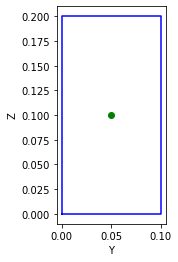

In [6]:
timber.plot()

### Define Nodes

In [7]:
#addding nodes to Frame
BedFrame.addNode('G1',0,0,0)
BedFrame.addNode('G2',2.2,0,0)
BedFrame.addNode('G3',0,2.6,0)
BedFrame.addNode('G4',2.2,2.6,0)

BedFrame.addNode('T1',0,1.2,2.9)
BedFrame.addNode('T2',2.2,1.2,2.9)
BedFrame.addNode('T3',0,2.6,2.9)
BedFrame.addNode('T4',2.2,2.6,2.9)


BedFrame.addNode('P1',0,0,2)
BedFrame.addNode('P2',2.2,0,2)
BedFrame.addNode('P3',0,0.8,2)
BedFrame.addNode('P4',2.2,0.8,2)

BedFrame.addNode('DB1', 0,0,1.6)
BedFrame.addNode('DB2', 0,0.4,2)
BedFrame.addNode('DF1', 2.2,0,1.6)
BedFrame.addNode('DF2', 2.2,0.4,2)

In [8]:
#add Members 
BedFrame.addMember('col1.1', 'G1','DB1', KVH, timber)
BedFrame.addMember('col1.2', 'DB1','P1', KVH, timber)
BedFrame.addMember('col2.1', 'G2','DF1', KVH, timber)
BedFrame.addMember('col2.2', 'DF1','P2', KVH, timber)
BedFrame.addMember('col3', 'G3','T3', KVH, timber)
BedFrame.addMember('col4', 'G4','T4', KVH, timber)

BedFrame.addMember('DiagonalB1', 'DB1','DB2', KVH, timber)
BedFrame.addMember('DiagonalF1', 'DF1','DF2', KVH, timber)

BedFrame.addMember('TopBeam1', 'T1','T2', KVH, timber)
BedFrame.addMember('TopBeam2', 'T3','T4', KVH, timber)
BedFrame.addMember('TopBeam3', 'T1','T3', KVH, timber)
BedFrame.addMember('TopBeam4', 'T2','T4', KVH, timber)

BedFrame.addMember('PlattFormBeam1', 'P1','P2', KVH, timber)
BedFrame.addMember('PlattFormBeam2', 'P3','P4', KVH, timber)
BedFrame.addMember('PlattFormBeam3', 'P1','P3', KVH, timber)
BedFrame.addMember('PlattFormBeam4', 'P2','P4', KVH, timber)
\
BedFrame.addMember('x', 'P4','T2', KVH, timber)
BedFrame.addMember('y', 'P3','T1', KVH, timber)

"""
BedFrame.addMember('Beam3', '6','12', E, G, J, Iy, Iz, A)
BedFrame.addMember('Beam4', '5','11', E, G, J, Iy, Iz, A)

BedFrame.addMember('Beam5', '11','9', E, G, J, Iy, Iz, A)
BedFrame.addMember('Beam6', '12','10', E, G, J, Iy, Iz, A)

BedFrame.addMember('Beam7', '9','7', E, G, J, Iy, Iz, A)
BedFrame.addMember('Beam8', '10','8', E, G, J, Iy, Iz, A)"""

"\nBedFrame.addMember('Beam3', '6','12', E, G, J, Iy, Iz, A)\nBedFrame.addMember('Beam4', '5','11', E, G, J, Iy, Iz, A)\n\nBedFrame.addMember('Beam5', '11','9', E, G, J, Iy, Iz, A)\nBedFrame.addMember('Beam6', '12','10', E, G, J, Iy, Iz, A)\n\nBedFrame.addMember('Beam7', '9','7', E, G, J, Iy, Iz, A)\nBedFrame.addMember('Beam8', '10','8', E, G, J, Iy, Iz, A)"

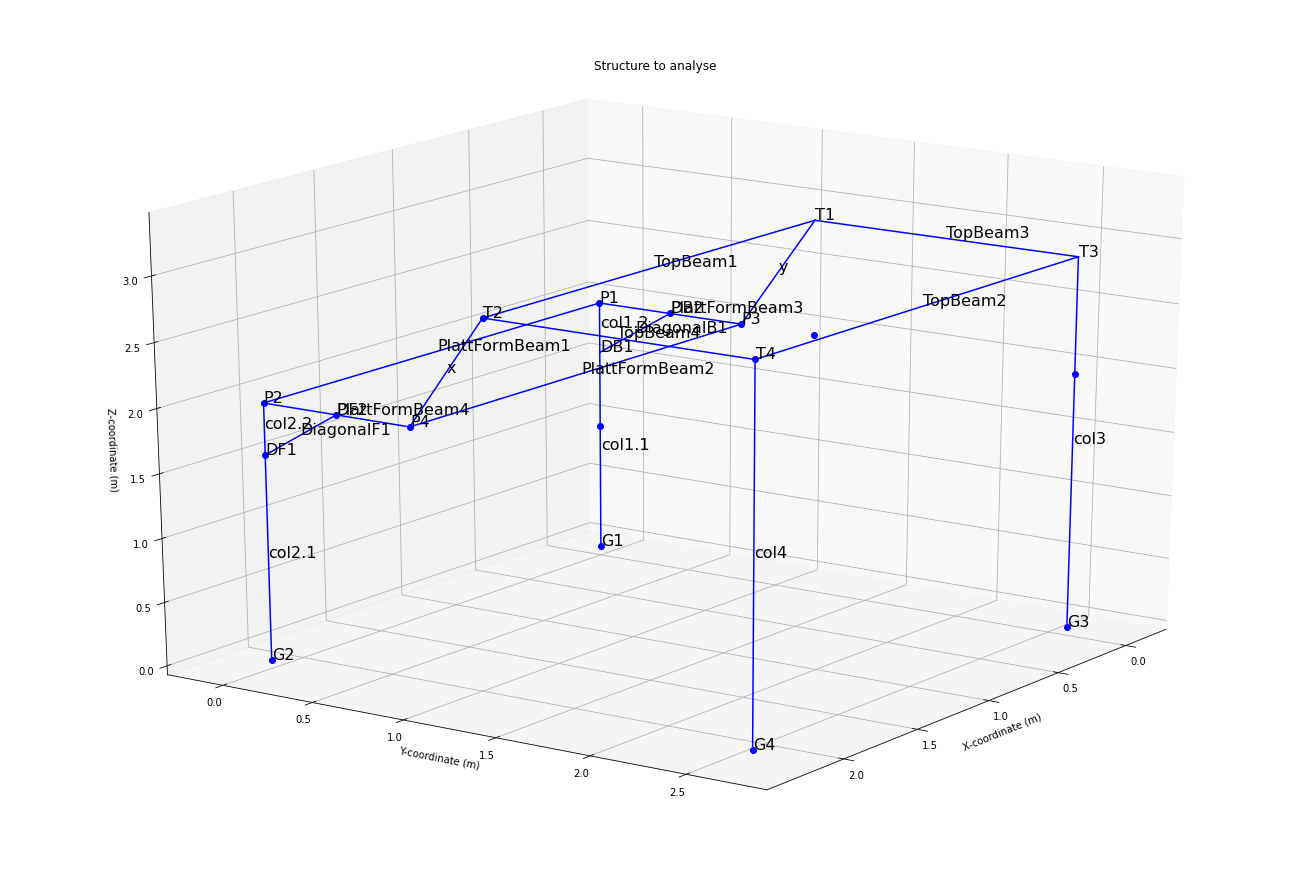

In [9]:
BedFrame.plot(deformed=False)

In [10]:
#create supports 
BedFrame.makeSupport('G1', Ux=0,Uy=0,Uz=0,Rx=0,Ry=0,Rz=0)
BedFrame.makeSupport('G2', Ux=0,Uy=0,Uz=0,Rx=0,Ry=0,Rz=0)
BedFrame.makeSupport('G3', Ux=0,Uy=0,Uz=0,Rx=0,Ry=0,Rz=0)
BedFrame.makeSupport('G4', Ux=0,Uy=0,Uz=0,Rx=0,Ry=0,Rz=0)

In [ ]:
lol = 1
#BedFrame.addNodeLoad('5', Fy=lol*1000,Fx=lol*1000)

In [11]:
#set member loads
BedFrame.addMemberPtForce('TopBeam3', x=0.1,Fz=-2500)
BedFrame.addMemberPtForce('TopBeam3', x=1.3,Fz=-2500)
BedFrame.addMemberPtForce('TopBeam4', x=0.1,Fz=-2500)
BedFrame.addMemberPtForce('TopBeam4', x=1.3,Fz=-2500)

In [12]:
BedFrame.analyze()

In [13]:
#BedFrame.plot()
widgets.interact(BedFrame.plot, 
                 label_offset=(0.01, 0.1, 0.01), 
                 xMargin=(0.25, 3, 0.25),
                 yMargin=(0.25, 3, 0.25),
                 zMargin=(0.5, 3, 0.25),
                 elevation=(0,360,10),
                 rotation=(0,360,10),
                 xFac=(1,50,1))

interactive(children=(FloatSlider(value=0.01, description='label_offset', max=0.1, min=0.01, step=0.01), Float…

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>(*args, **kwargs)>

In [ ]:
#BedFrame.plot()
widgets.interact(BedFrame.Members['Beam8'].plot, 
                 label_offset=(0.01, 0.1, 0.01), 
                 xMargin=(0.25, 3, 0.25),
                 yMargin=(0.25, 3, 0.25),
                 zMargin=(0.5, 3, 0.25),
                 elevation=(0,360,10),
                 rotation=(0,360,10),
                 xFac=(1,20,1))

In [ ]:
BedFrame.Members['Beam3'].L

In [ ]:
BedFrame._compute_K()

In [ ]:
#BedFrame.reset()